In [159]:
import os
import librosa
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

### 🎈 파라미터

In [160]:
# 일정한 시간 간격으로 음압을 측정하는 주파수, 22050Hz
hp_sample_rate = 22050

# -- return 될 mfcc의 개수
n_mfcc_feature = 100

# -- wav를 작은 조각으로 자를 때 그 조각의 크기
# -- 자연어 처리 분야에서 25ms를 기본으로 하고 있음, 552(22050Hz*0.025)
window_len = int(np.ceil(hp_sample_rate * 0.025))

# -- frame의 length 결정
# -- window_len으로 잘린 작은 조각은 n_fft보다 작은 경우 0으로 padding을 붙여주어 n_fft만큼 크기가 맞춰짐.
# -- window_len보다 크거나 같아야 함.
n_fft_len = window_len

# -- wav를 작은 조각으로 자를 때 자르는 간격
# -- 10ms를 기본으로 하고 있음, 221(22050Hz*0.01)
hop_len = int(np.ceil(hp_sample_rate * 0.01))

# -- wav 길이가 다양하기 때문에, 길면 자르고 짧으면 padding 붙여서 일정하게 조절.
# -- 잘린 wav가 평균 0.1sec~0.3sec이니까 20(0.2sec~0.3sec) 으로 결정
max_pad_len = 20

n_columns = 174    
n_row = 40       
n_channels = 1
n_classes = 4

- https://youdaeng-com.tistory.com/5
- https://ahnjg.tistory.com/93

file name : ../data/wavs/test/Bass Sample 30.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


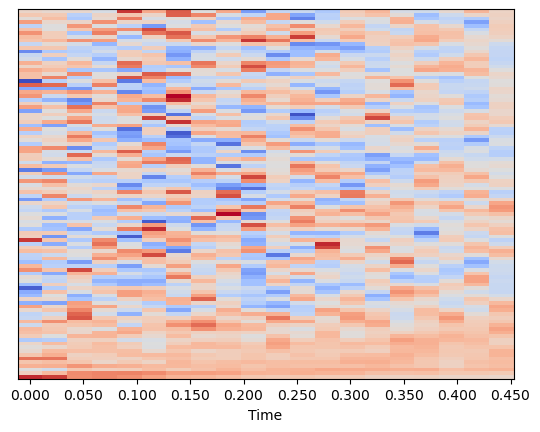

In [170]:
from sklearn import preprocessing

root = "../data/wavs/test/"
test = root + "Bass Sample 30.wav"

def extract_feature(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, sr=hp_sample_rate) # -- sr : 22050
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc_feature, n_fft=n_fft_len, hop_length=hop_len)

        # -- 전처리 scaling
        mfccs = preprocessing.scale(mfccs, axis=1)
        pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))
        padded_mfcc = pad2d(mfccs, max_pad_len)

        # pad_width = max_pad_len - mfccs.shape[1]
        # mfccs = np.pad(mfccs, pad_width=((0,0), (0, pad_width)), mode='constant')
        print('file name :', file_name, ', length:', audio.shape[0]/float(sample_rate), 'secs, ', 'mfccs:', padded_mfcc.shape)
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        print(e)
        return None

    return padded_mfcc

result = extract_feature(test)
librosa.display.specshow(result, sr=hp_sample_rate, x_axis='time')

In [162]:
root_path = "../data/wavs/train/"
wav_list = os.listdir(root_path)
wav_files = [os.path.join(root_path, file) for file in wav_list if file.endswith('.wav')]
print(len(wav_files))

# data는 우리가 리브로사로 추출한 mfccs라는 특성이고
# class_label은 그 음향의 종류를 나타낸다.

features = []
for wav_file in wav_files:
    data = extract_feature(wav_file)
    class_label = 0
    if 'Overhead' in wav_file:
        class_label = 1
    elif 'Snare' in wav_file:
        class_label = 2
    elif 'Tom' in wav_file:
        class_label = 3
    elif 'Bass' in wav_file:
        class_label = 4
    else:
        class_label = 0
    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

160
file name : ../data/wavs/train/Bass Sample 1.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 10.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Bass Sample 11.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 12.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 13.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 14.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 15.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Bass Sample 16.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 17.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 18.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 19.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 2.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Bass Sample 20.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 21.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 22.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 23.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 24.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Bass Sample 25.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 26.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 27.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 28.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Bass Sample 29.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 3.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 30.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 31.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 32.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Bass Sample 33.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 34.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 35.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Bass Sample 36.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 37.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 38.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 39.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 4.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Bass Sample 40.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 5.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 6.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 7.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Bass Sample 8.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Bass Sample 9.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 1.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 10.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 11.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Overhead Sample 12.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 13.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 14.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 15.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 16.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Overhead Sample 17.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 18.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 19.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 2.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 20.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Overhead Sample 21.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 22.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Overhead Sample 23.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 24.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 25.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 26.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Overhead Sample 27.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 28.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 29.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 3.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Overhead Sample 30.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 31.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 32.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 33.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Overhead Sample 34.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 35.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 36.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 37.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Overhead Sample 38.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 39.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 4.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 40.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Overhead Sample 5.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 6.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 7.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Overhead Sample 8.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Overhead Sample 9.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Snare Sample 1.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Snare Sample 10.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Snare Sample 11.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Snare Sample 12.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Snare Sample 13.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Snare Sample 14.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Snare Sample 15.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Snare Sample 16.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Snare Sample 17.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Snare Sample 18.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Snare Sample 19.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Snare Sample 2.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Snare Sample 20.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Snare Sample 21.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Snare Sample 22.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Snare Sample 23.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Snare Sample 24.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Snare Sample 25.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Snare Sample 26.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Snare Sample 27.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Snare Sample 28.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Snare Sample 29.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Snare Sample 3.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Snare Sample 30.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Snare Sample 31.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Snare Sample 32.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Snare Sample 33.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Snare Sample 34.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Snare Sample 35.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Snare Sample 36.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Snare Sample 37.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Snare Sample 38.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Snare Sample 39.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Snare Sample 4.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Snare Sample 40.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Snare Sample 5.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Snare Sample 6.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Snare Sample 7.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Snare Sample 8.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Snare Sample 9.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Tom Sample 1.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Tom Sample 10.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Tom Sample 11.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Tom Sample 12.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Tom Sample 13.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Tom Sample 14.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Tom Sample 15.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Tom Sample 16.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Tom Sample 17.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Tom Sample 18.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Tom Sample 19.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Tom Sample 2.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Tom Sample 20.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Tom Sample 21.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Tom Sample 22.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Tom Sample 23.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Tom Sample 24.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Tom Sample 25.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Tom Sample 26.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Tom Sample 27.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Tom Sample 28.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Tom Sample 29.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Tom Sample 3.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Tom Sample 30.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Tom Sample 31.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Tom Sample 32.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Tom Sample 33.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Tom Sample 34.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Tom Sample 35.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Tom Sample 36.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Tom Sample 37.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Tom Sample 38.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Tom Sample 39.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Tom Sample 4.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Tom Sample 40.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Tom Sample 5.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encount

file name : ../data/wavs/train/Tom Sample 6.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Tom Sample 7.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Tom Sample 8.wav , length: 2.0 secs,  mfccs: (100, 20)
file name : ../data/wavs/train/Tom Sample 9.wav , length: 2.0 secs,  mfccs: (100, 20)


/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/jaeserrr/anaconda3/envs/drum/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


In [163]:
from keras.utils import to_categorical

# 불러온 featuresdf에서 feature는 X에 저장하였고 class_label은 y로 저장하였다.
# 헌데 y는 yy로 변환과정을 거쳐서 다시 저장되었다.
# 둘의 차이는 원-핫-인코딩의 여부이다.
# 원-핫-인코딩은 1,2,3 있을 때 1: [1.0.0] / 2:[0.1.0] / 3:[0.0.1] 로 변환해주는 거임.
# 이렇게 변환해서 사용하는 이유는 우리가 작성할 딥러닝 모델이 멀티 클래스(3~ 가지) 분류를 하기 때문이다.

X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [164]:
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y[:10])
print(yy[:10])
print(y_test[:10])

(128, 100, 20)
(32, 100, 20)
[4 4 4 4 4 4 4 4 4 4]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [165]:


# input shape 조정
# cpu를 사용해서 수행한다
with tf.device('/cpu:0'):
    x_train = tf.reshape(x_train, [-1, n_row, n_columns, n_channels])
    x_test = tf.reshape(x_test, [-1, n_row, n_columns, n_channels])

InvalidArgumentError: {{function_node __wrapped__Reshape_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input to reshape is a tensor with 256000 values, but the requested shape requires a multiple of 6960 [Op:Reshape]

In [ ]:
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Input, TimeDistributed
from tensorflow.keras.models import Model

model = keras.Sequential()

model.add(tf.keras.layers.LSTM(input_shape=(n_row, n_columns, n_channels), filters=16, return_sequences=True))
model.add(tf.keras.layers.Dense(units=n_classes, activation='softmax'))

model.summary()

In [ ]:
training_epochs = 72
num_batch_size = 128

learning_rate = 0.001
opt = keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=training_epochs)

In [ ]:
import matplotlib.pyplot as plt

def vis(history, key):
    x = np.arange(0, training_epochs)
    y = list(history.history[key])
    plt.plot(x, y)
    plt.title(key)
    
def plot_history(history) :
    # 0 accuracy, 1 loss
    key_value = list(set([i.split("val_")[-1] for i in list(history.history.keys())]))
    plt.figure(figsize=(12, 4))
    for idx , key in enumerate(key_value) :
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()
    
plot_history(history)

In [ ]:
print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, batch_size=128)
print('test loss, test acc:', results)

model.save("drum_classifier_model")

In [ ]:
root = "../data/wavs/test/"
# test = root + "WaveDrum02_60#MIX_mp3cut.wav"
test = root + "Overhead Sample 30.wav"
# test = root + "Snare Sample 30.wav"
# test = root + "Tom Sample 30.wav"

n_columns = 174    
n_row = 40       
n_channels = 1

# input shape 조정
# cpu를 사용해서 수행한다
test = np.array(extract_feature(test))
with tf.device('/cpu:0'):
    test = tf.reshape(test, [-1, n_row, n_columns, n_channels])

# [Overhead, Snare, Tom, Bass]
model.predict(test, batch_size=128)